<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/01.Tensorflow%20%EA%B8%B0%EC%B4%88%20/%20MNIST%20%EB%B6%84%EB%A5%98%20%EB%AA%A8%EB%8D%B8%EB%A7%81(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow?  

* `Tensor`(다차원 배열)이 `Flow`(흘러간다)
  * 1 Rank Tensor : 1차원 배열 (벡터)
  * 2 Rank Tensor : 2차원 배열 (행렬)
  * 3 Rank Tensor : Tensor
* 만들어진 계산그래프에 텐서를 흘려 보내기 때문에 텐서플로우
  * 계산할 내용들을 미리 정리를 해 놓고, 실제 계산이 필요한 순간(훈련)에 데이터(배열)를 흘려 보낸다

# **Tensorflow 2.0 기본 사용 방법**

In [ ]:
import numpy as np
import tensorflow as tf

## Tensor 만들기

1. list -> Tensor
- `tf.constant()` 안에 리스트를 넣으면 됨

In [ ]:
tf.constant([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

2. tuple -> Tensor

In [ ]:
tf.constant(((1, 2, 3),
             (4, 5, 6)))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

3. ndarray -> Tensor

In [ ]:
arr = np.array([1, 2, 3])
tf.constant(arr)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

## Tensor 정보 확인

In [ ]:
tensor = tf.constant([1, 2, 3])
tensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

**shape** 확인하기

In [ ]:
tensor.shape

TensorShape([3])

**dtype** 확인하기

In [ ]:
tensor.dtype

tf.int32

Tensor를 생성하면서 dtype을 정의해 줄 수 있음

In [ ]:
tensor = tf.constant([1, 2, 3], dtype=tf.float32)
tensor.dtype

tf.float32

In [ ]:
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

Tensor의 `dtype` 변환하기  
* `numpy`에서는 `astype` 사용  
* `tensorflow`에서는 `cast`사용

In [ ]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([1, 2, 3], dtype=uint8)>

Tensor에서 numpy 배열 불러오기

In [ ]:
tensor.numpy()

array([1., 2., 3.], dtype=float32)

In [ ]:
np.array(tensor)

array([1., 2., 3.], dtype=float32)

## Tensorflow 난수 생성

`numpy`에서의 **정규 분포** : `np.random.randn`  

`tensorflow`에서의 **정규 분포** : `tf.random.normal`

In [ ]:
tf.random.normal([3, 3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.6910228 , -1.6806632 ,  0.43980786],
       [-0.03607227, -1.7979953 , -0.48729724],
       [ 1.0277128 ,  1.8112932 ,  1.1921417 ]], dtype=float32)>

In [ ]:
# 균등 분포 
tf.random.uniform([3, 3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.12179172, 0.7181405 , 0.6850233 ],
       [0.9697733 , 0.06726801, 0.54145277],
       [0.68185675, 0.14544964, 0.41935766]], dtype=float32)>

**Tensorflow 배열은 수정이 불가하다**  

--> `Tensorflow Session`의 `Variable`만 수정 가능  
```python
tensor[0] = 1  # 불가능!!
```

# Keras로 MNIST 분류 모델링 수행

In [ ]:
from tensorflow.keras import datasets

In [ ]:
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Fully Connected Layer를 사용하기 위해 평탄화, 필요에 따라 OHE 진행

# Keras?  

`Tensorflow`를 기반으로 하는 유명한 논문, 레이어들을 구현해 놓은 패키지

## Fully Connected Layer 모델링하기

필요한 레이어들은 `tf.keras.layers` 패키지에 모두 들어 있음
- `Input Layer` : 입력층 담당
- `Flatten Layer` : 배치를 제외한 평탄화 담당
- `Dense Layer` : `Affine` 연산 담당
- `Activation Layer` : 활성화 함수 레이어 ( 선택에 따라 사용 안 할 수 있음 )

클래스를 함수처럼 쓸 수 있도록 따로 만들어진 문법이 있음  
그러므로 아래와 같이 바로 객체 사용 가능 
        
        net = Flatten()(net)

In [ ]:
# 데이터 간단하게 정규화시키기
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Activation, Input

input = Input(shape=(28, 28))  # 굳이 필요 없음
net = Flatten()(input)  # 이전 레이어의 결과값을 넣음으로써 레이어끼리 연결
net = Dense(512)(net)  # 1층 끝!

net = Activation("relu")(net) # 2층 끝

# 이전 층 반복하여 쌓기
net = Dense(256)(net)
net = Activation("relu")(net)

# 출력층 - softmax 함수 사용
net = Dense(10)(net)
net = Activation("softmax")(net)

model = tf.keras.Model(inputs=input, outputs=net, name="BASIC_MNIST")
model.summary() # 모델 요약

Model: "BASIC_MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                

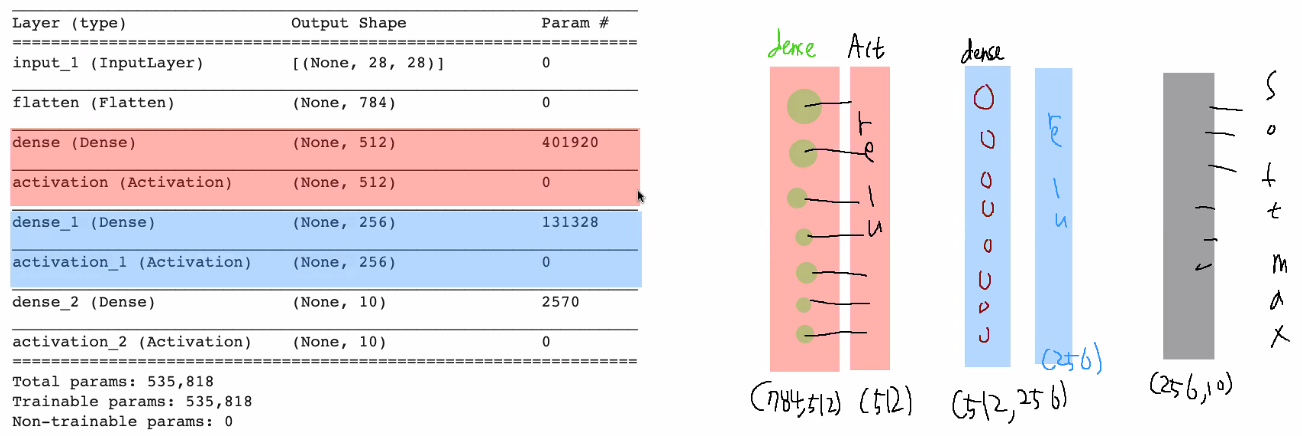

## 최적화 계획 세우기
- `Loss Function`(손실 함수) - MSC, CEE 중 무엇을 쓸지 결정
- `Optimization` (최적화 함수) - SGD, ADAM, RMSProp 중 무엇을 쓸지 결정
- `Metrics` - 테스트 세트에 대한 평가 기준

### Loss Function 선정 기준

- **이진 분류**를 수행하는 경우 ( Binary Classification)
    - `mse` : 출력층의 뉴련이 1개인 경우 - with `sigmoid`
    - `cross entropy error` : 출력층의 뉴런이 2개인 경우 - with `softmax` ( 제일 자주 사용됨 )  
        - **`binary_crossentropy`** 사용

- **다중 분류**를 수행하는 경우 ( Multiclass Classification )
    - `cross entropy error` : 출력층의 뉴런을 클래스의 개수만큼 설정
        - **`categorical_crossentropy`** 사용

#### Categorical Cross Entropy의 종류

- Label이 `[0, 1, 2]` 처럼 One-Hot Encoding 이 되어 있지 않은 경우
    - **`sparse_categorical_crossentropy`** 사용

- Label이 One-Hot Encoding 이 되어 있는 경우
    - **`categorical_crossentropy`** 사용

**y_train**을 확인하여 어떤 Loss Function을 사용할지 결정해야 함

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

**`y_train` 확인 결과 one-hot 인코딩이 안 되어 있다**  

---> 즉, `sparse_categorical_crossentropy` 를 사용하거나,  
`y_train`을 one-hot 인코딩 한 후 `categorical_crossentropy` 를 사용하면 됨

In [ ]:
loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy>

In [ ]:
# 만약 y_train이 원핫인코딩이 되어 있으면 categorical_crossentropy 사용
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy>

In [ ]:
# 만약 이진분류라면?
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy>

### Optimizer 설정하기

- `sgd` : `tf.keras.optimizers.SGD()` 확률적 경사 하강법
- `rmsprops` : `tf.keras.optimizers.RMSprop()`
- `adam` : `tf.keras.optimizers.Adam()`  
  ---> 일반적으로 가장 많이 사용되는 최적화 기법, 뭘 쓸지 모르겠을 때는 adam을 써보기

In [ ]:
optm = tf.keras.optimizers.Adam()
optm

### 테스트 세트 평가방법(Metrics) 선정하기

- 테스트 세트의 평가방식 ( evaluate )

테스트 세트로는 평가를 하지, 훈련을 하지는 않음  
--> Loss가 없음 (rmse 등)  
-----> 훈련은 트레인 세트에서 다 끝내고, 테스트 세트는 테스트만을 위해 남겨두어야 함

In [ ]:
# 세 코드 다 같은 의미, 셋 모두 사용 가능함

metrics = ['accuracy']
# metrics = ['acc']
# metrics = [tf.keras.metrics.Accuracy()]

## 모델 컴파일
- 텐서플로우 세션에 위치한 계산그래프에 데이터를 집어넣기 직전 작업을 완료
- 손실 함수, 최적화, 평가 방법 등을 계산그래프에 적용

In [ ]:
model.compile(
    optimizer=optm,
    loss=loss_func,
    metrics=metrics
)

## 훈련용 하이퍼 파라미터 설정
- 에폭 횟수 (`num_epochs`)
- 배치 크기 (`batch_size`)

In [ ]:
num_epochs = 10
batch_size = 32

## 훈련 시작
- `fit`

In [ ]:
model.fit(
    X_train, # 훈련 x 데이터(feature)
    y_train, # 훈련 y 레이블(target)
    batch_size=batch_size, # 배치 사이즈
    epochs=num_epochs, # 에폭 횟수
    shuffle=True, # 데이터를 섞어가면서 훈련
    validation_split=0.2 # 검증 세트 비율
)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2022 - accuracy: 0.9386 - val_loss: 0.1340 - val_accuracy: 0.9578
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0856 - accuracy: 0.9730 - val_loss: 0.0973 - val_accuracy: 0.9701
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0580 - accuracy: 0.9813 - val_loss: 0.0834 - val_accuracy: 0.9762
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0423 - accuracy: 0.9862 - val_loss: 0.0955 - val_accuracy: 0.9741
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.1010 - val_accuracy: 0.9745
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0270 - accuracy: 0.9911 - val_loss: 0.1358 - val_accuracy: 0.9671
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0970 - val_accuracy

## 런칭 직전 평가  
- `evaluate`

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9764


[0.10860174894332886, 0.9764000177383423]